In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree

In [2]:
df = pd.read_csv('salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [3]:
input = df.drop('salary_more_then_100k', axis='columns')
input

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [4]:
target = df['salary_more_then_100k']
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [10]:
company = le_company.fit_transform(df['company'])
job = le_company.fit_transform(df['job'])
degree = le_company.fit_transform(df['degree'])

In [11]:
input['company'] = company
input['job'] = job
input['degree'] = degree
input

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [12]:
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.2)

In [13]:
model = tree.DecisionTreeClassifier()

In [14]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
model.score(X_test, y_test)

0.75

In [16]:
len(X_test)

4

In [17]:
X_test

,company,job,degree
3,2,0,1
4,2,1,0
2,2,0,0
11,1,2,1


In [18]:
model.predict(X_test)

array([1, 1, 1, 1], dtype=int64)

In [19]:
y_test

3     1
4     0
2     1
11    1
Name: salary_more_then_100k, dtype: int64

In [20]:
model.score(X_train, y_train)

1.0

In [21]:
from sklearn.metrics import confusion_matrix
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[0, 1],
       [0, 3]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

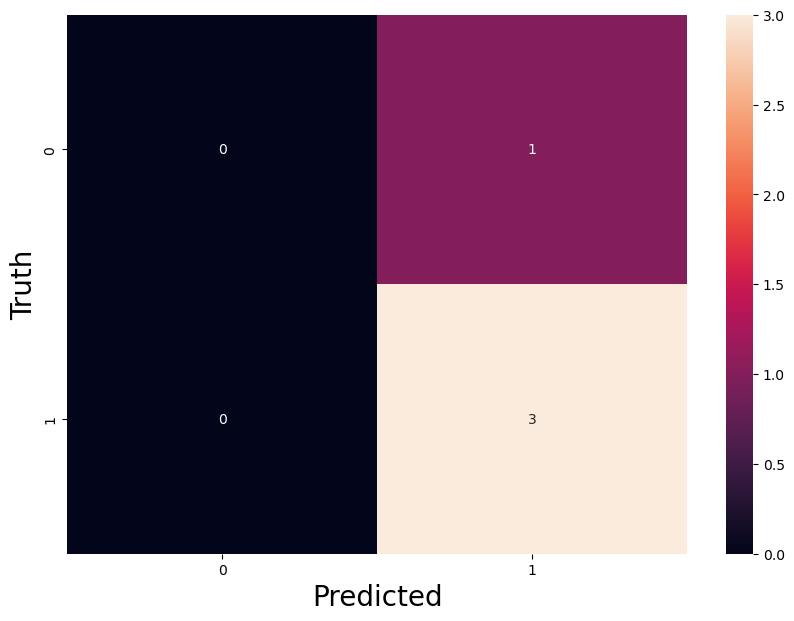

In [23]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted", fontsize = 20)
plt.ylabel("Truth", fontsize = 20)